In [1]:
# My own convnets model using Tensor Flow
# from convnets import Model

In [46]:
# Reading the inputs!
def reading_file_name(base_dir):
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(base_dir) if isfile(join(base_dir, f))]
    return onlyfiles

test_files_name = reading_file_name('Large Files/test.rotfaces/test/')
train_files_name = reading_file_name('Large Files/train.rotfaces/train/')

In [3]:
from imageio import imread
from os.path import join

track = len(train_files_name)
count = 0

train = dict()
for f in train_files_name:
    train[f] = (imread(join('Large Files/train.rotfaces/train/', f)))
    count += 1
    print('{0}%'.format(round((count/track)*100), 2), end='\r')

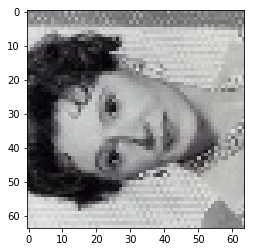

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train['0-10049200_1891-09-16_1958.jpg'])

In [6]:
from pandas import read_csv
labels = read_csv('Large Files/train.rotfaces/train.truth.csv')

labels

,fn,label
0,0-10049200_1891-09-16_1958.jpg,rotated_left
1,0-10110600_1985-09-17_2012.jpg,rotated_left
2,0-10126400_1964-07-07_2010.jpg,upright
3,0-1013900_1917-10-15_1960.jpg,rotated_right
4,0-10166400_1960-03-12_2008.jpg,upside_down
5,0-102100_1970-10-09_2008.jpg,rotated_left
6,0-1024100_1982-06-07_2011.jpg,rotated_left
7,0-10292500_1984-03-26_2009.jpg,rotated_left
8,0-1035700_1945-11-27_2013.jpg,upside_down
9,0-10416800_1907-01-08_1967.jpg,upright


In [7]:
X = []

for item in labels.fn:
    X.append(train[item])

In [8]:
Ya = []

for item in labels.label:
    Ya.append(item)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Ya)
print(le.classes_)

Y = le.transform(Ya)
print(Y)

['rotated_left' 'rotated_right' 'upright' 'upside_down']
[0 0 2 ... 0 0 1]


In [13]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y, num_classes=4)
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split
Xtr, Xte, Ytr, Yte = train_test_split(X, Y)

In [15]:
# le.inverse_transform([Ytr[1]])
Ytr[1]

array([0., 0., 1., 0.], dtype=float32)

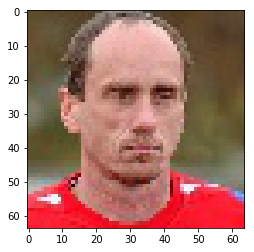

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Xtr[1])

In [17]:
from numpy import array

Xtr = array(Xtr).astype('float16')
Xte = array(Xte).astype('float16')
Ytr = array(Ytr).astype('float16')
Yte = array(Yte).astype('float16')

print('{0}, {1}, {2}, {3}'.format(Xtr.shape, Xte.shape, Ytr.shape, Yte.shape))

(36672, 64, 64, 3), (12224, 64, 64, 3), (36672, 4), (12224, 4)


In [18]:
# my_model = Model({
#     'Xtr': Xtr, 'Xte': Xte, 'Ytr': Ytr, 'Yte':Yte
# }, frame=(64,64))

In [19]:
# my_model.starter()

In [20]:
# my_model.train(batch_size=128)
# print(my_model.evaluate())
# print(my_model.predict(Xte[0]))

In [26]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [31]:
batch_size = 32
num_classes = 4
epochs = 2
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_rotated_images.h5'

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=Xtr.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [33]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Xtr /= 255
Xte /= 255

In [34]:
print('Not using data augmentation.')
model.fit(Xtr, Ytr,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(Xte, Yte),
          shuffle=True)

Not using data augmentation.
Train on 36672 samples, validate on 12224 samples
Epoch 1/2
36672/36672 [==============================] - 708s 19ms/step - loss: 1.3864 - acc: 0.2522 - val_loss: 1.3866 - val_acc: 0.2477
Epoch 2/2
36672/36672 [==============================] - 697s 19ms/step - loss: 1.3863 - acc: 0.2514 - val_loss: 1.3863 - val_acc: 0.2479


In [36]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(Xte, Yte, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/souza/Documents/ds-test/saved_models/keras_rotated_images.h5 
12224/12224 [==============================] - 51s 4ms/step
Test loss: 1.3863308523337878
Test accuracy: 0.24787303664921467


In [90]:
from imageio import imread
from os.path import join

track = len(test_files_name)
count = 0

test = dict()
for f in test_files_name:
    test[f] = (imread(join('/home/souza/Documents/ds-test/Large Files/test.rotfaces/test', f)))
    count += 1
    print('{0}%'.format(round((count/track)*100), 2), end='\r')

In [91]:
Ynew = dict()
for key in test:
    Ynew[key] = model.predict_classes(test[key].reshape(1, 64, 64, 3))

In [92]:
CSV = list()
CSV.append(['fn', 'label'])
from numpy import argmax
for item in Ynew:
    CSV.append([item, le.inverse_transform([argmax(Ynew[item])])[0]])

In [93]:
from pandas import DataFrame
DataFrame(CSV).to_csv('Large Files/test.rotfaces/test.preds.csv', index=False, header=False)